In [68]:
import numpy as np
import pandas as pd


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [70]:
from google.colab import drive
drive.mount('/content/drive')

In [134]:
df_kg = pd.read_csv('/content/drive/MyDrive/train.csv')

In [135]:
df_kg

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,young
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young


In [73]:
df_kg.shape

(891, 13)

In [74]:
df_kg['Age'].min()

0.42

In [75]:
df_kg['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [76]:
df_kg.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S,young
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,young
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,middle


##DATA SHAPE AND COLUMNS

In [77]:
df_kg.shape, df_kg.columns

((891, 13),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_range'],
       dtype='object'))

##LOCATION

In [78]:

df_kg.iloc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Age_range                                                 middle
Name: 1, dtype: object

##DATADESCRIBE

In [79]:
df_kg.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [80]:
df_kg.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_range        0
dtype: int64

In [81]:
df_kg['Age'].mode()

0    28.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


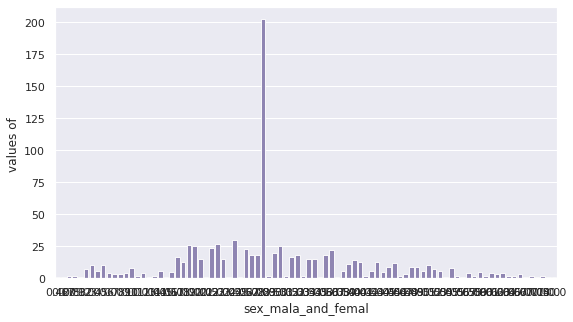

In [82]:
color=sns.color_palette()

int_level = df_kg['Age'].value_counts()

plt.figure(figsize=(9,5))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[4])
plt.ylabel('values of ',fontsize=12)
plt.xlabel('sex_mala_and_femal',fontsize=12)
plt.show()

In [83]:
Median=df_kg['Age'].median()
df_kg['Age']= df_kg['Age'].fillna(Median)

Mode=df_kg['Embarked'].mode()[0]#0 or 'index' : get mode of each column
df_kg['Embarked']= df_kg['Embarked'].fillna(Mode)

df_kg.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_range        0
dtype: int64

In [84]:
df_kg['Age'].mode()

0    28.0
dtype: float64

In [85]:
df_kg.to_excel("titanic1.xlsx")

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


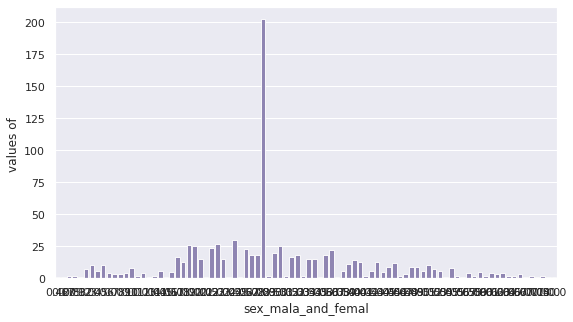

In [87]:
color=sns.color_palette()

int_level = df_kg['Age'].value_counts()

plt.figure(figsize=(9,5))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[4])
plt.ylabel('values of ',fontsize=12)
plt.xlabel('sex_mala_and_femal',fontsize=12)
plt.show()

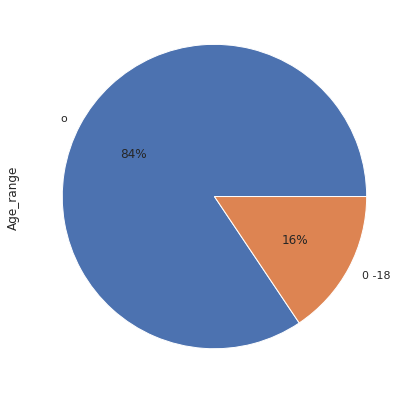

In [88]:
 df_kg['Age_range']=np.where((df_kg['Age']>0) & (df_kg['Age']<=18),'0 -18','o') 
 df_kg['Age_range'].value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.0f%%')

In [89]:
df_kg['Age_range']=np.where((df_kg['Age']>0) & (df_kg['Age']<=18),'minor',df_kg['Age_range'])
df_kg['Age_range']=np.where((df_kg['Age']>=18) & (df_kg['Age']<=30),'young',df_kg['Age_range'])
df_kg['Age_range']=np.where((df_kg['Age']>30) & (df_kg['Age']<=45),'middle',df_kg['Age_range'])
df_kg['Age_range']=np.where((df_kg['Age']>45) & (df_kg['Age']<=60),'agedpeople',df_kg['Age_range'])
df_kg['Age_range']=np.where((df_kg['Age']>60) & (df_kg['Age']<=90),'older',df_kg['Age_range'])
df_kg

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,young
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young


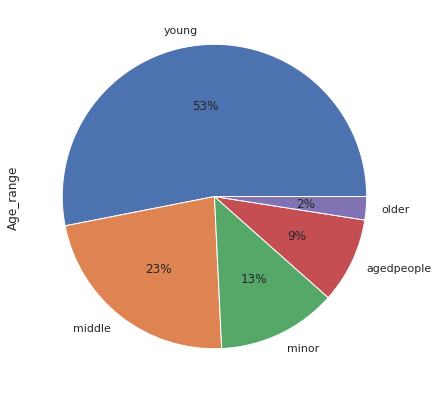

In [90]:
df_kg['Age_range'].value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.0f%%')

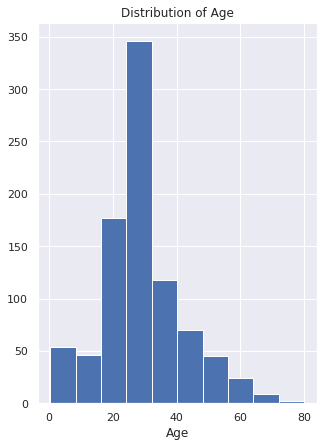

In [91]:
plt.figure(figsize=(5,7))
plt.hist(df_kg['Age'])
plt.title('Distribution of Age')
plt.xlabel("Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


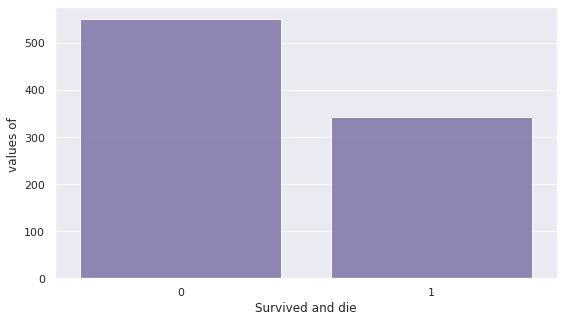

In [92]:
color=sns.color_palette()

int_level = df_kg['Survived'].value_counts()

plt.figure(figsize=(9,5))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[4])
plt.ylabel('values of ',fontsize=12)
plt.xlabel('Survived and die',fontsize=12)
plt.show()

Text(0.5, 1.0, 'Survived')

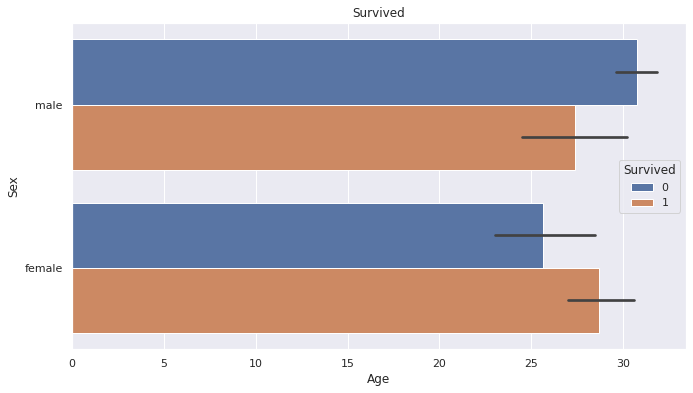

In [93]:
plt.figure(figsize=(11,6))

sns.barplot(y='Sex',x='Age',hue='Survived',data=df_kg);
plt.title("Survived")

Text(0.5, 1.0, 'Travil')

<Figure size 1440x1440 with 0 Axes>

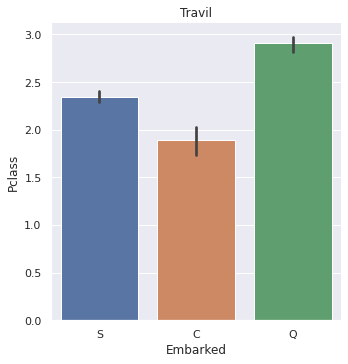

In [94]:
plt.figure(figsize=(20,20))
g=sns.catplot(data=df_kg,kind="bar",x="Embarked",y="Pclass",)
plt.title("Travil")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


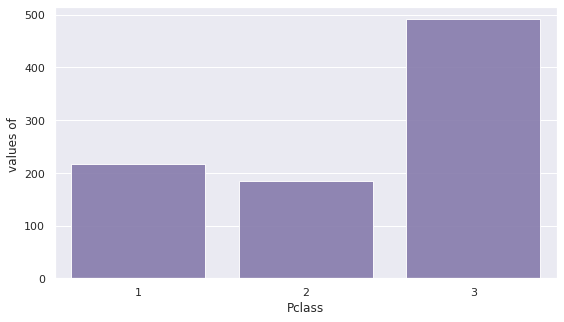

In [95]:
olor=sns.color_palette()

int_level = df_kg['Pclass'].value_counts()

plt.figure(figsize=(9,5))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[4])
plt.ylabel('values of ',fontsize=12)
plt.xlabel('Pclass',fontsize=12)
plt.show()

Text(0.5, 1.0, 'Travil')

<Figure size 1440x1440 with 0 Axes>

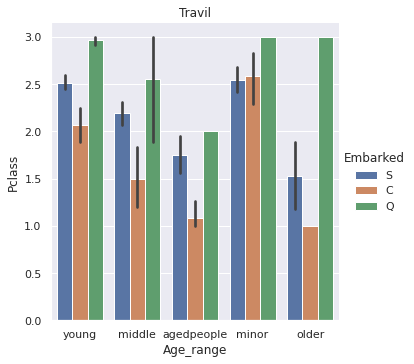

In [96]:
plt.figure(figsize=(20,20))
g=sns.catplot(data=df_kg,kind="bar",x="Age_range",y="Pclass",hue="Embarked")
plt.title("Travil")

Text(0.5, 1.0, 'Travil')

<Figure size 1440x1440 with 0 Axes>

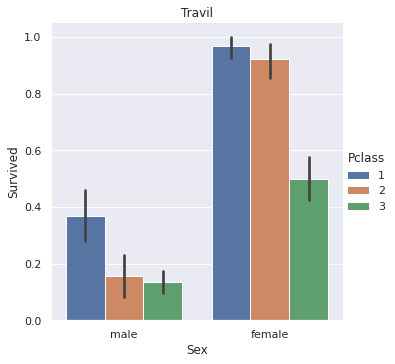

In [97]:
plt.figure(figsize=(20,20))
g=sns.catplot(data=df_kg,kind="bar",x="Sex",y="Survived",hue="Pclass")
plt.title("Travil")

In [98]:
corrmat = df_kg.corr()

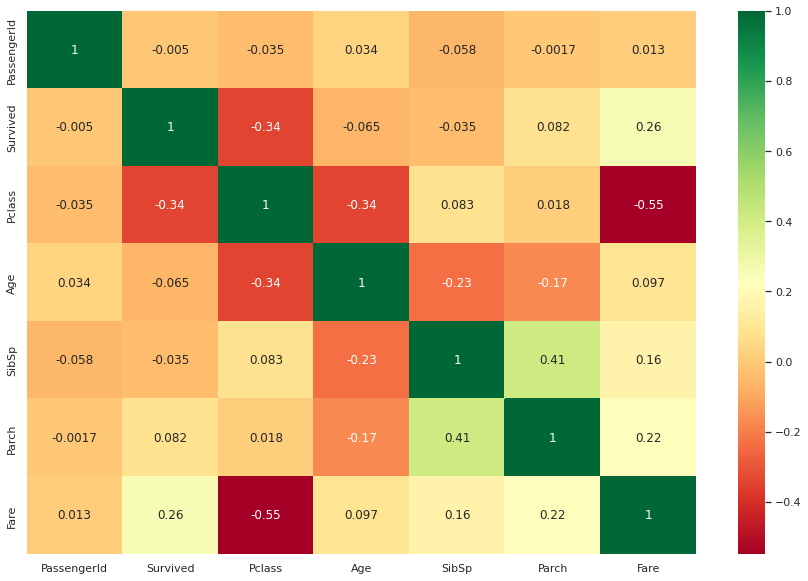

In [99]:
top_corr_feature = corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(df_kg[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

In [100]:
df_kg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_range    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [101]:
df1=df_kg[df_kg['Survived']==1][['PassengerId','Name','Sex','Age']]
df1

,PassengerId,Name,Sex,Age
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0
...,...,...,...,...
875,876,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0
879,880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0
880,881,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0
887,888,"Graham, Miss. Margaret Edith",female,19.0


In [102]:
df_kg['Fare'].count

<bound method Series.count of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

In [103]:
df_kg[df_kg['Survived']==1]['PassengerId'].nunique()



342

In [104]:
df_kg[df_kg['Sex']=='male']['PassengerId'].nunique()

577

In [105]:
df_kg[(df_kg['Sex']=='male')&(df_kg['Survived']==1)]['PassengerId'].nunique()

109

In [106]:

df_kg[df_kg['Sex']=='female']['PassengerId'].nunique()


314

In [107]:
df_kg[(df_kg['Sex']=='female')&(df_kg['Survived']==1)]['PassengerId'].nunique()

233

In [108]:
109 + 233

342

In [109]:
df1.corr()

,PassengerId,Age
PassengerId,1.000000,0.066591
Age,0.066591,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


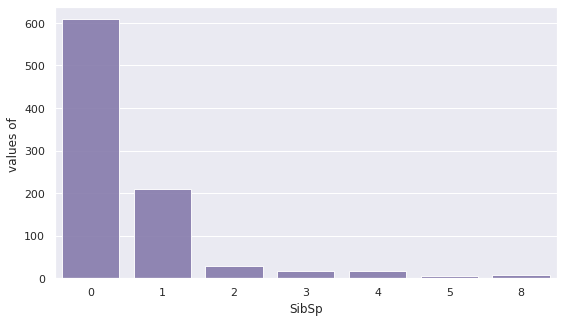

In [110]:
color=sns.color_palette()

int_level = df_kg['SibSp'].value_counts()

plt.figure(figsize=(9,5))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[4])
plt.ylabel('values of ',fontsize=12)
plt.xlabel('SibSp',fontsize=12)

plt.show()

In [111]:
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy import stats

In [112]:
df_g=pd.crosstab(df_kg['Sex'],df_kg['Embarked'])
print(df_g)

Embarked   C   Q    S
Sex                  
female    73  36  205
male      95  41  441


In [113]:
df1=stats.chi2_contingency(df_g)
print(df1)

(12.91702420065256, 0.00156712570238841, 2, array([[ 59.20538721,  27.13580247, 227.65881033],
       [108.79461279,  49.86419753, 418.34118967]]))


In [114]:
df_k = pd.read_csv('/content/drive/MyDrive/train.csv')

In [115]:
df_k.head(63)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN


In [116]:
df_k['Age'].mean()

29.69911764705882

In [117]:
Median=df_k['Age'].median()
df_k['Age']= df_k['Age'].fillna(Median)

Mode=df_k['Embarked'].mode()[0]#0 or 'index' : get mode of each column
df_k['Embarked']= df_k['Embarked'].fillna(Mode)

df_k.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [118]:
df_k.head(63)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,S


In [119]:
df_k.drop(["Age",
           "Name", 
           "Ticket",
           "Cabin",
           "PassengerId"],axis=1, inplace= True)

In [120]:
df_k.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [121]:
df_k.dropna(inplace=True)

In [122]:
df_k.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [123]:
sex = pd.get_dummies(df_k["Sex"], drop_first=True)
embark = pd.get_dummies(df_k["Embarked"], drop_first=True)
# df_k.drop('Pclass', axis=1,inplace=True)

In [124]:
df_k=pd.concat([df_k,sex,embark], axis=1)
df_k.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,1,0,7.2500,S,1,0,1
1,1,1,female,1,0,71.2833,C,0,0,0
2,1,3,female,0,0,7.9250,S,0,0,1
3,1,1,female,1,0,53.1000,S,0,0,1
4,0,3,male,0,0,8.0500,S,1,0,1


In [125]:
df_k.drop(["Sex","Embarked"],axis=1,inplace=True) 

In [126]:
df_k.head(5)

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S
0,0,3,1,0,7.2500,1,0,1
1,1,1,1,0,71.2833,0,0,0
2,1,3,0,0,7.9250,0,0,1
3,1,1,1,0,53.1000,0,0,1
4,0,3,0,0,8.0500,1,0,1


In [127]:
x=df_k.drop("Survived",axis=1) #features
y=df_k["Survived"] #target variable

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [129]:
model = LogisticRegression(max_iter=100)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
predic = model.predict(x_test)

In [131]:
report = classification_report(y_test,predic)

In [132]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       157
           1       0.73      0.73      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [133]:
accuracy_score(y_test, predic)

0.7761194029850746